**Harmonic Oscillator**

Block 1: Check that the trajectories are periodic

Block 2: Check that total energy is conserved.

**MD simulation**

Block 3: Check energy is conserved in hot.dat resp. cold.dat.

Block 4: Find the melting temperature

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patheffects as pe

In [11]:
# Block 1
df = pd.read_csv("verlet.csv")

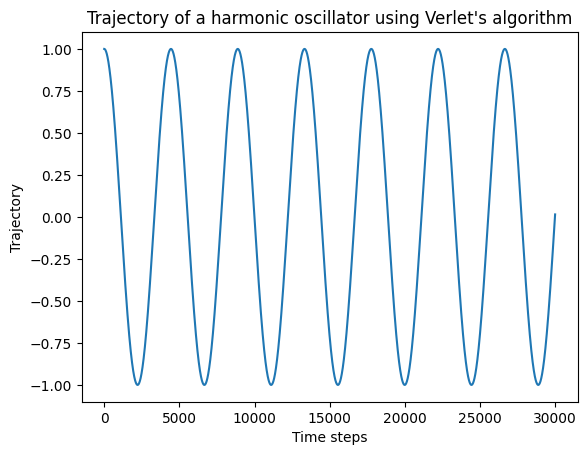

In [12]:
# Block 1
df.plot(x="Time", y="Position", 
        xlabel = 'Time steps', ylabel = 'Trajectory', 
        title = "Trajectory of a harmonic oscillator using Verlet's algorithm")
plt.legend().set_visible(False)
plt.savefig("Trajectory.png")
plt.show()


In [13]:
# Block 2
eTot = pd.read_csv("verlet.csv")

In [14]:
# Block 2
print("Total energy change (last - first):")
diff = eTot.loc[len(eTot) - 1, "Total energy"] - eTot.loc[0, "Total energy"]
print(diff)

Total energy change (last - first):
-4.999999999588667e-07


In [15]:
# Block 3 and 4

hot_time = []
cold_time = []
hot_temp = []
cold_temp = []
hot_energy = []
cold_energy = []

with open("MDiter_cold",'r') as f:
    cold = f.readlines()

with open("MDiter_hot",'r') as f:
    hot = f.readlines()
     
for line in cold:
    cold_time.append(float(line.split()[0]))
    cold_energy.append(float(line.split()[1]))
    cold_temp.append(float(line.split()[4]))
    
for line in hot:
    hot_time.append(float(line.split()[0]))
    hot_energy.append(float(line.split()[1]))
    hot_temp.append(float(line.split()[4]))
    



In [16]:
# Block 3
cold_diff = cold_energy[-1] - cold_energy[0]
hot_diff = hot_energy[-1] - hot_energy[0]
print("Cold energy difference:", cold_diff)
print("Hot energy difference:", hot_diff)

Cold energy difference: 0.02330597499
Hot energy difference: 0.0087055983


1531.5355545005075
1533.0559128135942


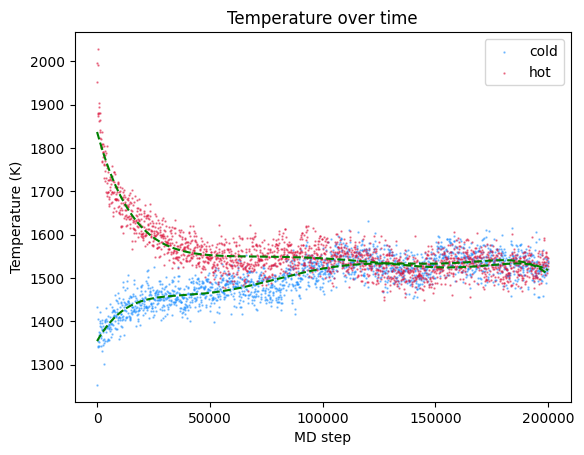

In [35]:
# Block 4
    
fig, ax = plt.subplots()

ax.scatter(cold_time, cold_temp, s=0.5, alpha=0.5, c='dodgerblue')
ax.scatter(hot_time, hot_temp, s=0.5, alpha=0.5, c='crimson')
ax.set(xlabel='MD step', ylabel='Temperature (K)',
       title='Temperature over time')
ax.legend(['cold', 'hot'])
ax.set_xticks(range(0, 200001, 50000))


z = np.polyfit(hot_time, hot_temp, 7)
p = np.poly1d(z)
plt.plot(hot_time, p(hot_time), linestyle="--", color="green")
print(np.mean(p(hot_time)[1000:]))

z = np.polyfit(cold_time, cold_temp, 7)
p = np.poly1d(z)
plt.plot(cold_time, p(cold_time), linestyle="--", color="green")
print(np.mean(p(cold_time)[1000:]))



fig.savefig("Temperature.png", dpi=300)
plt.show()

In [21]:
cold = list(zip(cold_time, cold_temp))
cold

[(0.0, 1433.0),
 (100.0, 1253.0),
 (200.0, 1344.0),
 (300.0, 1405.0),
 (400.0, 1341.0),
 (500.0, 1354.0),
 (600.0, 1360.0),
 (700.0, 1369.0),
 (800.0, 1344.0),
 (900.0, 1376.0),
 (1000.0, 1353.0),
 (1100.0, 1400.0),
 (1200.0, 1390.0),
 (1300.0, 1397.0),
 (1400.0, 1422.0),
 (1500.0, 1374.0),
 (1600.0, 1366.0),
 (1700.0, 1387.0),
 (1800.0, 1344.0),
 (1900.0, 1362.0),
 (2000.0, 1380.0),
 (2100.0, 1402.0),
 (2200.0, 1397.0),
 (2300.0, 1381.0),
 (2400.0, 1332.0),
 (2500.0, 1357.0),
 (2600.0, 1390.0),
 (2700.0, 1376.0),
 (2800.0, 1345.0),
 (2900.0, 1358.0),
 (3000.0, 1302.0),
 (3100.0, 1349.0),
 (3200.0, 1383.0),
 (3300.0, 1383.0),
 (3400.0, 1402.0),
 (3500.0, 1401.0),
 (3600.0, 1398.0),
 (3700.0, 1354.0),
 (3800.0, 1375.0),
 (3900.0, 1406.0),
 (4000.0, 1430.0),
 (4100.0, 1389.0),
 (4200.0, 1389.0),
 (4300.0, 1355.0),
 (4400.0, 1401.0),
 (4500.0, 1385.0),
 (4600.0, 1387.0),
 (4700.0, 1412.0),
 (4800.0, 1389.0),
 (4900.0, 1356.0),
 (5000.0, 1360.0),
 (5100.0, 1382.0),
 (5200.0, 1385.0),
 (530